# **Reto | Explorando el índice de felicidad**

El Informe Mundial sobre la Felicidad es una encuesta que clasifica a 156 países por sus niveles de bienestar, tomando en cuenta 6 factores:
1.	Producción económica
2.	Apoyo social
3.	Esperanza de vida
4.	Libertad
5.	Generosidad
6.	Ausencia de corrupción


El primer informe se publicó en 2012 y continúa ganando reconocimiento mundial a medida que los gobiernos, las organizaciones y la sociedad civil utilizan cada vez más indicadores de felicidad para informar sus decisiones de formulación de políticas.
En este sentido, se tomará el estudio del 2019 para explorar los datos por país o región y obtener gráficas relevantes. El archivo incluye el puntaje (score) en una escala donde la mejor vida posible está representada con 10 y la peor con 0. Las siguientes columnas representan la medida en que los seis factores contribuyen a evaluar la felicidad en cada país.

Para lograr lo anterior, se descargó el archivo Happiness_reporte.csv y el dataframe Metadata.csv, y se realizaron los siguientes pasos:
1.	Genera una libreta en Google Colab, cuya estructura esté basada en los análisis solicitados.
2.	Guarda en un dataframe (happiness) todos los registros del archivo Happiness_report.csv.


In [1]:
# Importar librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el archivo Happiness_report.csv en un dataframe
happiness = pd.read_csv("/content/Happiness_report.csv")

# Mostrar los primeros registros del dataframe happiness
happiness.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


3.	A partir del dataframe happiness obtén otro (mexico) donde únicamente almacenes la información de México. Haz que la columna Country or region quede como índice.

In [2]:
# Filtrar los datos para obtener solo la información de México
mexico = happiness[happiness['Country or region'] == 'Mexico']
mexico.set_index('Country or region', inplace=True)

# Mostrar los primeros registros del dataframe mexico
mexico.head()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Country or region,,,,,,,,
Mexico,23,6.595,1.07,1.323,0.861,0.433,0.074,0.073


4.	Obtén un histograma del puntaje (score) para identificar el rango o clase más frecuente. Ubica el valor de México con una etiqueta de texto.

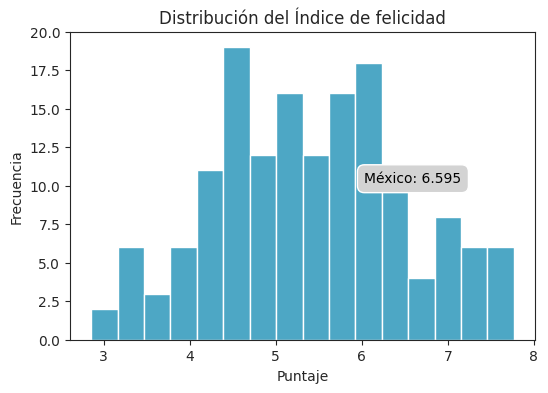

In [3]:
# Establecer el estilo de Seaborn
sns.set_style("ticks")

# Graficar el histograma del puntaje de felicidad
plt.figure(figsize=(6, 4))
sns.histplot(data=happiness, x='Score', bins=16, color='#118ab2', edgecolor='white')
plt.title('Distribución del Índice de felicidad')
plt.xlabel('Puntaje')
plt.ylabel('Frecuencia')

# Cambiar el rango del eje y
plt.ylim(0, 20)

# Obtener el puntaje de felicidad de México
puntaje_mexico = mexico['Score'].values[0]

# Ubicar el puntaje de México en la gráfica con una etiqueta de texto en forma de rectángulo
plt.text(puntaje_mexico, 10, f'México: {puntaje_mexico}', fontsize=10, ha='center', va='bottom',
         bbox=dict(facecolor='lightgrey', edgecolor='white', boxstyle='round,pad=0.5'), color='black')

plt.show()

5.	Construye un boxplot para la columna esperanza de vida (Healthy life expectancy). Ubica el valor de México con una anotación.

<ipython-input-4-2e817e9ffd7e>:8: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.annotate('México', xy=(0, mexico['Healthy life expectancy']), xytext=(0.2, mexico['Healthy life expectancy']),


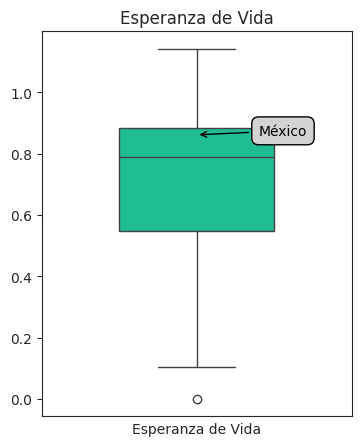

In [4]:
# Ajustar el tamaño de la figura
plt.figure(figsize=(4, 5))

# Graficar el boxplot vertical de la esperanza de vida
sns.boxplot(y=happiness['Healthy life expectancy'], color='#06d6a0', width=0.5)

# Anotación con flecha para México
plt.annotate('México', xy=(0, mexico['Healthy life expectancy']), xytext=(0.2, mexico['Healthy life expectancy']),
             arrowprops=dict(facecolor='black', arrowstyle='->', color='black'), bbox=dict(facecolor='lightgrey', edgecolor='black', boxstyle='round,pad=0.5'),
             fontsize=10, color='black')

# Ajustes de la gráfica
plt.title('Esperanza de Vida')
plt.xlabel('Esperanza de Vida')
plt.ylabel('')
plt.xticks([])
plt.grid(False)
plt.show()

6.	Crea una gráfica circular para analizar en qué medida los factores contribuyen a evaluar la felicidad en México.

In [5]:
# Transponer el dataframe 'mexico' y eliminar la columna 'Score'
mexico_transpuesto = mexico.drop(columns=['Score','Overall rank']).T

# Renombrar el índice y la primera columna
mexico_transpuesto.index.name = ''
mexico_transpuesto.columns = ['Factores'] + list(mexico_transpuesto.columns[1:])

mexico_transpuesto

,Factores
,
GDP per capita,1.070
Social support,1.323
Healthy life expectancy,0.861
Freedom to make life choices,0.433
Generosity,0.074
Perceptions of corruption,0.073


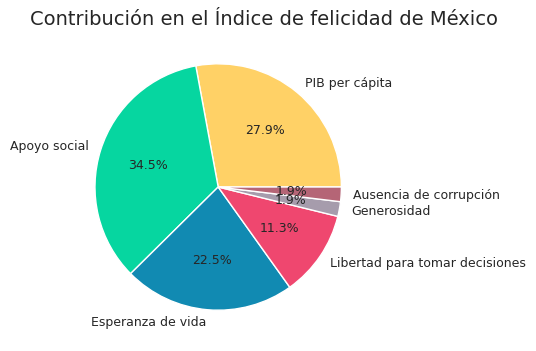

In [6]:
# etiquetas en español
etiquetas=['PIB per cápita','Apoyo social','Esperanza de vida','Libertad para tomar decisiones','Generosidad','Ausencia de corrupción']
# colores para la gráfica
colores=['#ffd166', '#06d6a0', '#118ab2', '#ef476f', '#a69cac', '#b56576']

# Ajustar el tamaño de la figura
plt.figure(figsize=(4, 4))
plt.pie(mexico_transpuesto['Factores'], labels=etiquetas,
        colors=colores,
        autopct='%1.1f%%', startangle=0, textprops={'fontsize': 9})
plt.title('Contribución en el Índice de felicidad de México', fontsize=14, x=0.65)
plt.show()

7.	Filtra el dataframe para quedarte con 5 países (el más feliz, el menos feliz, México y dos más de tu interés) y visualiza en una misma gráfica los 6 factores.

In [7]:
# Ordenar el DataFrame según la columna de puntajes (Score)
happiness_sorted = happiness.sort_values(by='Score')

# Obtener el país más feliz (primer país en la clasificación)
pais_mas_feliz = happiness_sorted.iloc[0]['Country or region']

# Obtener el país menos feliz (último país en la clasificación)
pais_menos_feliz = happiness_sorted.iloc[-1]['Country or region']

print("El país más feliz es:", pais_mas_feliz)
print("El país menos feliz es:", pais_menos_feliz)

El país más feliz es: South Sudan
El país menos feliz es: Finland


In [8]:
# Seleccionar los cinco países
# Adicional se escogen Brasil y Estados Unidos
paises_interes = ['Finland', 'South Sudan', 'Mexico', 'Brazil', 'United States']

# Filtrar el DataFrame para obtener los datos de los cinco países
cinco_paises = happiness[happiness['Country or region'].isin(paises_interes)]

cinco_paises

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
18,19,United States,6.892,1.433,1.457,0.874,0.454,0.280,0.128
22,23,Mexico,6.595,1.070,1.323,0.861,0.433,0.074,0.073
31,32,Brazil,6.300,1.004,1.439,0.802,0.390,0.099,0.086
155,156,South Sudan,2.853,0.306,0.575,0.295,0.010,0.202,0.091


In [9]:
# Se transforma el df para poder graficar
data=cinco_paises.drop(['Score', 'Overall rank'], axis=1)
data=data.melt(id_vars='Country or region', var_name='Factores', value_name='Contribución al puntaje')
data

,Country or region,Factores,Contribución al puntaje
0,Finland,GDP per capita,1.340
1,United States,GDP per capita,1.433
2,Mexico,GDP per capita,1.070
3,Brazil,GDP per capita,1.004
4,South Sudan,GDP per capita,0.306
5,Finland,Social support,1.587
6,United States,Social support,1.457
7,Mexico,Social support,1.323
8,Brazil,Social support,1.439
9,South Sudan,Social support,0.575


In [10]:
# Diccionario de traducción
traducciones_paises = {
    'Finland': 'Finlandia',
    'United States': 'Estados Unidos',
    'Mexico': 'México',
    'Brazil': 'Brasil',
    'South Sudan': 'Sudán del Sur'}

# Mapear nombres de países
data['Country or region'] = data['Country or region'].map(traducciones_paises)

# Diccionario de traducción
traducciones_factores = {
    'GDP per capita': 'PIB per cápita',
    'Social support': 'Apoyo social',
    'Healthy life expectancy': 'Esperanza de vida',
    'Freedom to make life choices': 'Libertad para tomar decisiones',
    'Generosity': 'Generosidad',
    'Perceptions of corruption': 'Percepción de corrupción'}

# Mapear nombres de factores
data['Factores'] = data['Factores'].map(traducciones_factores)

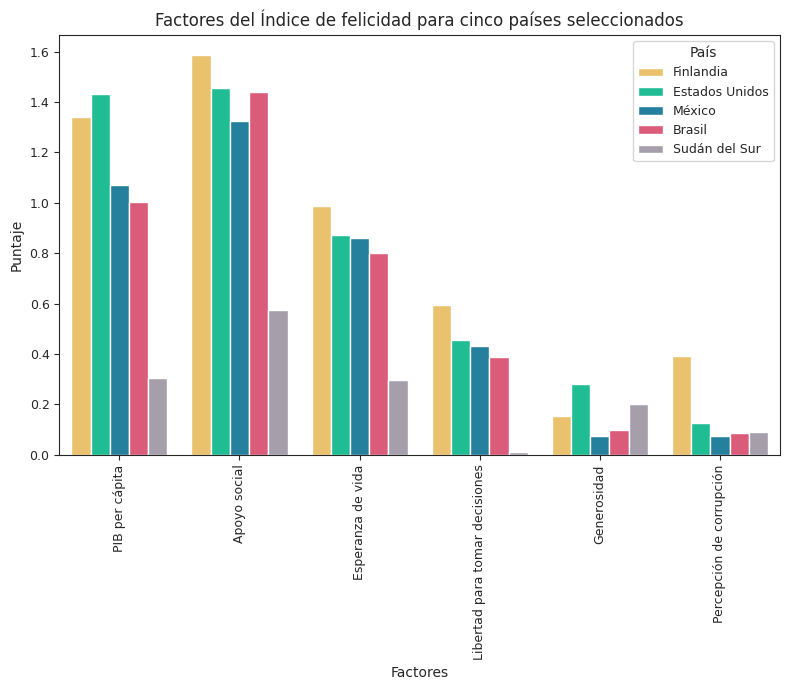

In [11]:
# Configurar el estilo de Seaborn
sns.set_style("ticks")

# Configurar el tamaño del gráfico
plt.figure(figsize=(8, 7))

# Trazar el gráfico de barras utilizando Seaborn
paleta=['#ffc857', '#06d6a0', '#118ab2', '#ef476f', '#a69cac']
sns.barplot(data=data, x='Factores', y='Contribución al puntaje', hue='Country or region', palette=paleta)

# Configurar etiquetas y título
plt.xlabel('Factores', fontsize=10)
plt.ylabel('Puntaje', fontsize=10)
plt.title('Factores del Índice de felicidad para cinco países seleccionados', fontsize=12)

# Rotar las etiquetas del eje x
plt.xticks(rotation=90)

# Mostrar la leyenda
plt.legend(title='País', fontsize=9, title_fontsize=10)

# Ajustar el tamaño de la letra en las etiquetas de los ejes
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)

plt.tight_layout()
plt.show()

8.	Crea una matriz de subgráficas de 2 x 3 con scatter plots del puntaje (score) versus los 6 factores, para determinar qué factor influye más en la evaluación.

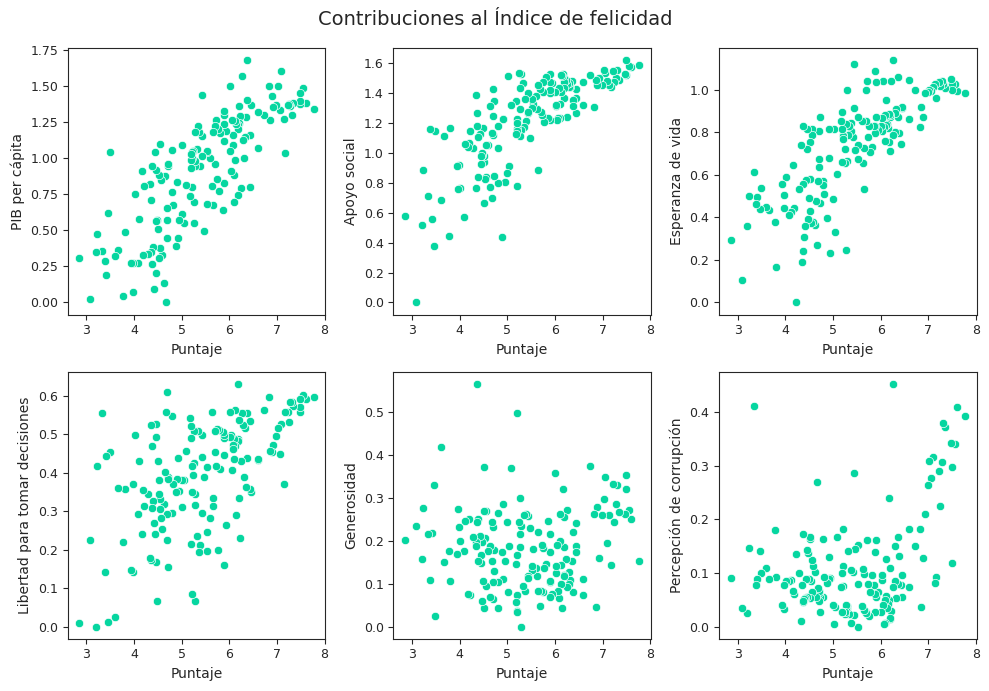

In [12]:
# Datos
factors = ['GDP per capita', 'Social support', 'Healthy life expectancy',
           'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
traducciones_factores = ['PIB per cápita','Apoyo social','Esperanza de vida',
                         'Libertad para tomar decisiones','Generosidad','Percepción de corrupción']

# Crear la matriz de subgráficas
fig, axes = plt.subplots(2, 3, figsize=(10, 7))

# Iterar sobre cada factor y crear el scatter plot correspondiente
for i, factor in enumerate(factors):
    row = i // 3  # Fila en la matriz de subgráficas
    col = i % 3   # Columna en la matriz de subgráficas
    sns.scatterplot(x='Score', y=factor, data=happiness, ax=axes[row, col], color='#06d6a0')
    axes[row, col].set_xlabel('Puntaje', fontsize=10)
    axes[row, col].set_ylabel(traducciones_factores[i], fontsize=10)
    # Ajustar el tamaño de la letra en las etiquetas de los ejes
    axes[row, col].tick_params(axis='x', labelsize=9)  # Cambiar tamaño de letra en xticks
    axes[row, col].tick_params(axis='y', labelsize=9)  # Cambiar tamaño de letra en yticks

# Añadir un título general sobre todas las subgráficas
fig.suptitle('Contribuciones al Índice de felicidad', fontsize=14)

# Ajustar espaciado entre subgráficas
plt.tight_layout()
plt.show()

Parece que los primeros tres factores son los que más contribuyen al índice.

Comprueba lo anterior con un heatmap donde incluyas los índices de correlación.

<ipython-input-13-943da101a3bb>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = happiness.corr()


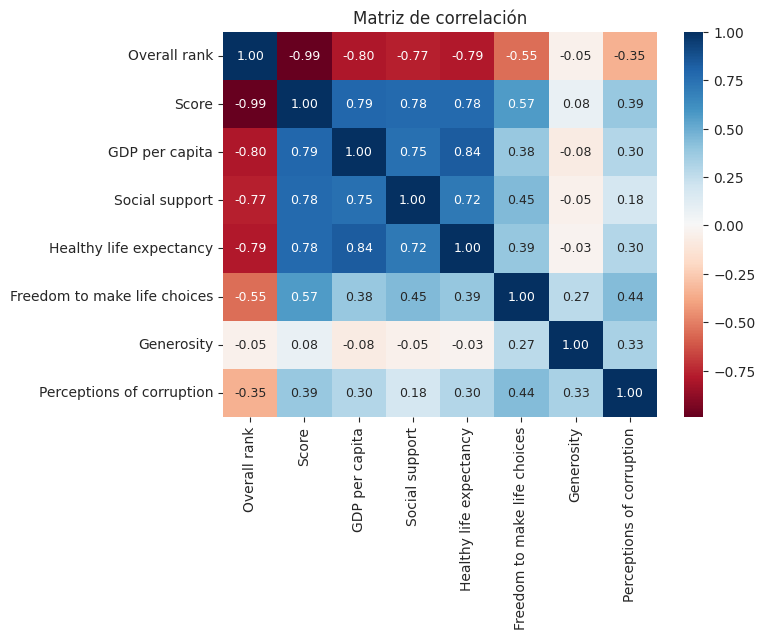

In [13]:
# Calcular la matriz de correlación
correlation_matrix = happiness.corr()

# Crear el heatmap
plt.figure(figsize=(7, 5))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='RdBu', fmt=".2f")

# Ajustar tamaño de letra de los labels y colorbar
heatmap.set_xticklabels(heatmap.get_xmajorticklabels(), fontsize = 10)
heatmap.set_yticklabels(heatmap.get_ymajorticklabels(), fontsize = 10)
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=10)

# Ajustar tamaño de letra de los valores de las correlaciones
for text in heatmap.texts:
    text.set_fontsize(9)

# Añadir título
plt.title('Matriz de correlación')

# Mostrar el heatmap
plt.show()

La matriz de correlación confirma lo que mostraban los *scatterplot*. El PIB per cápita, el apoyo social y la esperanza de vida son los factores más correlacionados con el índice de felicidad.

9.	Combina con el dataframe metada (Metadata.csv) para graficar la felicidad promedio por región.

In [14]:
# Cargar el archivo CSV en un DataFrame
metadata = pd.read_csv("Metadata.csv")

# Mostrar las primeras filas del DataFrame para verificar la importación
metadata.head()

,Country Code,Region,IncomeGroup,SpecialNotes,TableName
0,ABW,Latin America & Caribbean,High income,NaN,Aruba
1,AFG,South Asia,Low income,NaN,Afghanistan
2,AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola
3,ALB,Europe & Central Asia,Upper middle income,NaN,Albania
4,AND,Europe & Central Asia,High income,NaN,Andorra


In [15]:
# Unir los DataFrames en base al código de país
df_combined = pd.merge(happiness, metadata, left_on='Country or region', right_on='TableName')

# Mostrar el DataFrame combinado
df_combined.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Country Code,Region,IncomeGroup,SpecialNotes,TableName
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,FIN,Europe & Central Asia,High income,A simple multiplier is used to convert the nat...,Finland
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,DNK,Europe & Central Asia,High income,NaN,Denmark
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,NOR,Europe & Central Asia,High income,NaN,Norway
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,ISL,Europe & Central Asia,High income,NaN,Iceland
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,NLD,Europe & Central Asia,High income,A simple multiplier is used to convert the nat...,Netherlands


In [16]:
# Calcular el puntaje promedio de felicidad por región
df_region_mean = df_combined.groupby('Region')['Score'].mean().reset_index()

regiones_espanol = {
    'East Asia & Pacific': 'Asia Oriental y Pacífico',
    'Europe & Central Asia': 'Europa y Asia Central',
    'Latin America & Caribbean': 'América Latina y el Caribe',
    'Middle East & North Africa': 'Medio Oriente y África del Norte',
    'North America': 'América del Norte',
    'South Asia': 'Asia del Sur',
    'Sub-Saharan Africa': 'África Subsahariana'}

# Remplazar nombres de las regiones por los nombres en español
df_region_mean['Region'] = df_region_mean['Region'].map(regiones_espanol)
df_region_mean

,Region,Score
0,Asia Oriental y Pacífico,5.658769
1,Europa y Asia Central,6.104174
2,América Latina y el Caribe,6.007579
3,Medio Oriente y África del Norte,5.757429
4,América del Norte,7.085000
5,Asia del Sur,4.526857
6,África Subsahariana,4.260000


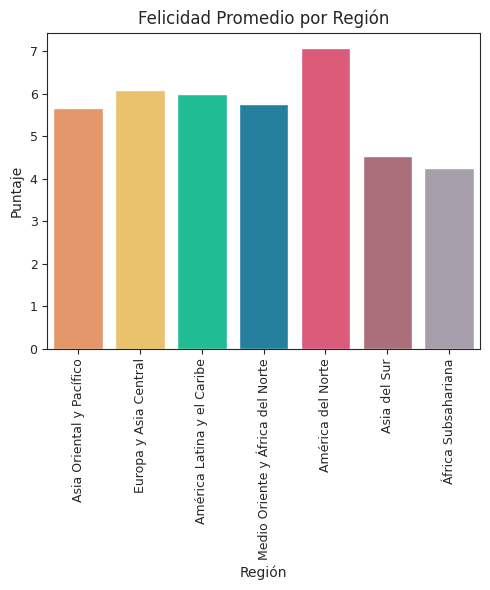

In [17]:
# Graficar la felicidad promedio por región
plt.figure(figsize=(5, 6))
# Trazar el gráfico de barras utilizando Seaborn
# colores para la gráfica
colores2=['#f79256', '#ffc857', '#06d6a0', '#118ab2', '#ef476f', '#b56576', '#a69cac']
sns.barplot(x='Region', y='Score', hue='Region', data=df_region_mean, palette=colores2, legend=False)

# Configurar etiquetas y título
plt.ylabel('Puntaje', fontsize=10)
plt.xlabel('Región', fontsize=10)
plt.title('Felicidad Promedio por Región', fontsize=12)

# Rotar las etiquetas del eje x
plt.xticks(rotation=90)

# Ajustar el tamaño de la letra en las etiquetas de los ejes
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)

plt.tight_layout()
plt.show()